

Library importing



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import zscore
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score
from sklearn.cluster import AgglomerativeClustering, DBSCAN

Dataset importing

In [ ]:
df = pd.read_excel('/content/qatar-monthly-statistics-visitor-arrivals-by-mode-of-enteryecxel.xlsx')

In [ ]:
df

,Month,Air,Land,Sea,Total Visitor Arrivals
0,2024-11,280402,208687,31479,520568
1,2024-03,196297,77090,55619,329006
2,2024-01,289633,327509,85666,702808
3,2023-12,270745,155378,92733,518856
4,2023-09,169986,75631,1500,247117
...,...,...,...,...,...
78,2019-03,495011,0,93061,588072
79,2019-01,163026,0,33568,196594
80,2018-08,1153300,0,55718,1209018
81,2018-02,316957,0,30667,347624


In [ ]:

df.rename(columns={
    ' Air': 'Air Arrivals',
    ' Land': 'Land Arrivals',
    ' Sea': 'Sea Arrivals',
    '  Total Visitor Arrivals': 'Total Visitor Arrivals'
}, inplace=True)


df.head()


,Month,Air Arrivals,Land Arrivals,Sea Arrivals,Total Visitor Arrivals
0,2024-11,280402,208687,31479,520568
1,2024-03,196297,77090,55619,329006
2,2024-01,289633,327509,85666,702808
3,2023-12,270745,155378,92733,518856
4,2023-09,169986,75631,1500,247117


Data Quality Check (Missing Values, Duplicates)

In [ ]:

missing_values = df.isnull().sum()


duplicate_rows = df.duplicated().sum()


df_info = df.info()

missing_values, duplicate_rows, df_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Month                   83 non-null     object
 1   Air Arrivals            83 non-null     int64 
 2   Land Arrivals           83 non-null     int64 
 3   Sea Arrivals            83 non-null     int64 
 4   Total Visitor Arrivals  83 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 3.4+ KB


(Month                     0
 Air Arrivals              0
 Land Arrivals             0
 Sea Arrivals              0
 Total Visitor Arrivals    0
 dtype: int64,
 np.int64(0),
 None)

Summary Statistics and Descriptive Analysis

In [ ]:

descriptive_stats = df.describe()


df_head = df.head()

# Display the summary statistics and data preview
descriptive_stats, df_head


(       Air Arrivals  Land Arrivals   Sea Arrivals  Total Visitor Arrivals
 count  8.300000e+01      83.000000      83.000000            8.300000e+01
 mean   4.271044e+05   49459.710843   50702.819277            5.272669e+05
 std    4.690361e+05   69345.026108   52220.821748            4.840109e+05
 min    1.164500e+04       0.000000       0.000000            1.331200e+04
 25%    1.091715e+05       0.000000    1630.000000            1.728295e+05
 50%    2.116090e+05    8407.000000   31479.000000            3.761060e+05
 75%    4.698730e+05   85300.000000   98350.000000            5.938360e+05
 max    1.939709e+06  327509.000000  196795.000000            2.136504e+06,
      Month  Air Arrivals  Land Arrivals  Sea Arrivals  Total Visitor Arrivals
 0  2024-11        280402         208687         31479                  520568
 1  2024-03        196297          77090         55619                  329006
 2  2024-01        289633         327509         85666                  702808
 3  2023

Data Visualization (Distribution of Columns)

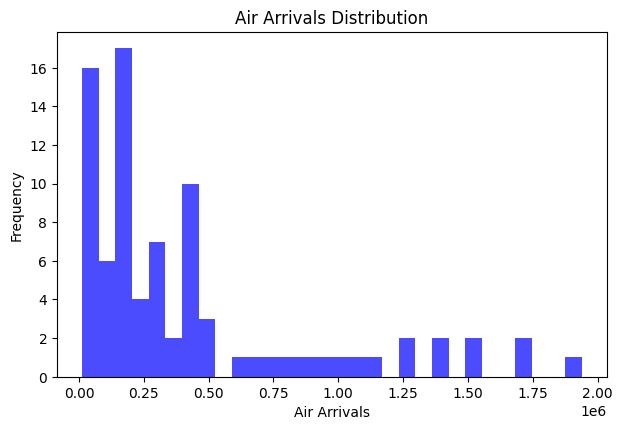

In [ ]:


# Plot histograms for each numerical column to check distributions
plt.figure(figsize=(12, 8))

# Air Arrivals distribution
plt.subplot(2, 2, 1)
plt.hist(df['Air Arrivals'], bins=30, color='blue', alpha=0.7)
plt.title('Air Arrivals Distribution')
plt.xlabel('Air Arrivals')
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()


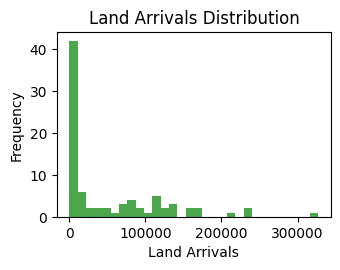

In [ ]:
# Land Arrivals distribution
plt.subplot(2, 2, 2)
plt.hist(df['Land Arrivals'], bins=30, color='green', alpha=0.7)
plt.title('Land Arrivals Distribution')
plt.xlabel('Land Arrivals')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()




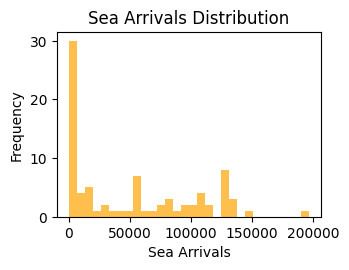

In [ ]:
# Sea Arrivals distribution
plt.subplot(2, 2, 3)
plt.hist(df['Sea Arrivals'], bins=30, color='orange', alpha=0.7)
plt.title('Sea Arrivals Distribution')
plt.xlabel('Sea Arrivals')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



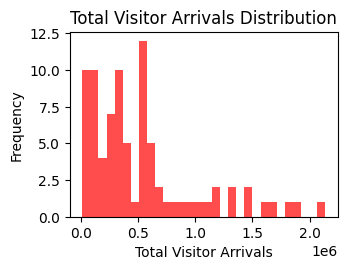

In [ ]:

# Total Visitor Arrivals distribution
plt.subplot(2, 2, 4)
plt.hist(df['Total Visitor Arrivals'], bins=30, color='red', alpha=0.7)
plt.title('Total Visitor Arrivals Distribution')
plt.xlabel('Total Visitor Arrivals')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Correlation analysis

In [ ]:

correlation_matrix = df[['Air Arrivals', 'Land Arrivals', 'Sea Arrivals', 'Total Visitor Arrivals']].corr()


correlation_matrix


,Air Arrivals,Land Arrivals,Sea Arrivals,Total Visitor Arrivals
Air Arrivals,1.000000,-0.332987,0.625172,0.988804
Land Arrivals,-0.332987,1.000000,-0.307664,-0.212607
Sea Arrivals,0.625172,-0.307664,1.000000,0.669642
Total Visitor Arrivals,0.988804,-0.212607,0.669642,1.000000


Anomaly Detection (Using Z-Score and Boxplot)

In [ ]:



z_scores = df[['Air Arrivals', 'Land Arrivals', 'Sea Arrivals', 'Total Visitor Arrivals']].apply(zscore)

# Set a threshold for detecting outliers (z-score > 3 or z-score < -3)
outliers_zscore = (z_scores > 3) | (z_scores < -3)

# Get rows with outliers based on Z-score
outlier_rows_zscore = df[outliers_zscore.any(axis=1)]

# Display outlier rows
outlier_rows_zscore[['Month', 'Air Arrivals', 'Land Arrivals', 'Sea Arrivals', 'Total Visitor Arrivals']]


,Month,Air Arrivals,Land Arrivals,Sea Arrivals,Total Visitor Arrivals
2,2024-01,289633,327509,85666,702808
19,2019-12,1939709,0,196795,2136504


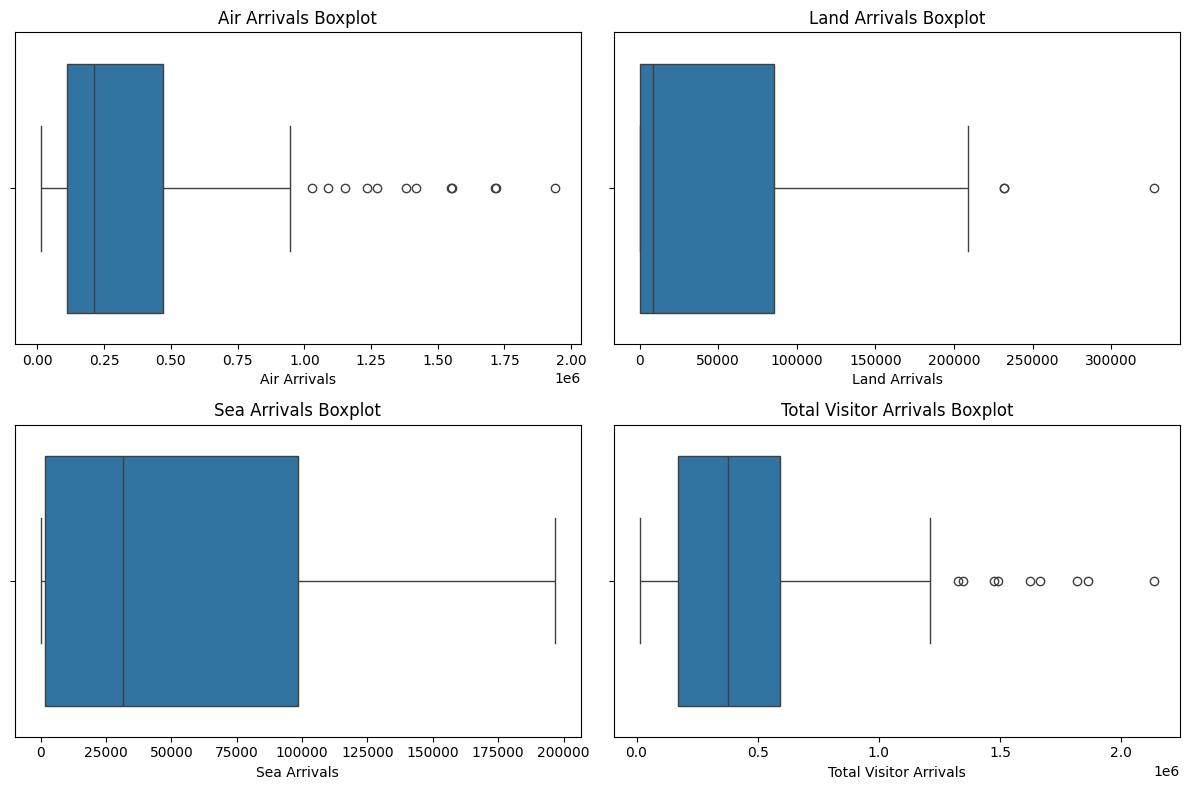

In [ ]:


# Create boxplots for each column to visualize the distribution and potential outliers
plt.figure(figsize=(12, 8))

# Air Arrivals boxplot
plt.subplot(2, 2, 1)
sns.boxplot(x=df['Air Arrivals'])
plt.title('Air Arrivals Boxplot')

# Land Arrivals boxplot
plt.subplot(2, 2, 2)
sns.boxplot(x=df['Land Arrivals'])
plt.title('Land Arrivals Boxplot')

# Sea Arrivals boxplot
plt.subplot(2, 2, 3)
sns.boxplot(x=df['Sea Arrivals'])
plt.title('Sea Arrivals Boxplot')

# Total Visitor Arrivals boxplot
plt.subplot(2, 2, 4)
sns.boxplot(x=df['Total Visitor Arrivals'])
plt.title('Total Visitor Arrivals Boxplot')

plt.tight_layout()
plt.show()


 Null Value Handling and Missing Data

In [ ]:
# Check if there are any null values in each column
missing_values = df.isnull().sum()

# Handle missing values (for simplicity, we will drop rows with missing data)
df_cleaned = df.dropna()

# Alternatively, you can fill missing values with the mean (or other methods) if required
# df_cleaned = df.fillna(df.mean())

# Display cleaned data
df_cleaned_info = df_cleaned.info()

missing_values, df_cleaned_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Month                   83 non-null     object
 1   Air Arrivals            83 non-null     int64 
 2   Land Arrivals           83 non-null     int64 
 3   Sea Arrivals            83 non-null     int64 
 4   Total Visitor Arrivals  83 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 3.4+ KB


(Month                     0
 Air Arrivals              0
 Land Arrivals             0
 Sea Arrivals              0
 Total Visitor Arrivals    0
 dtype: int64,
 None)

Check Data Types and Convert if Necessary

In [ ]:
# Check data types of all columns
data_types = df.dtypes

# If any columns need type conversion (e.g., 'Month' should be datetime)
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')

# Verify if data types are correct
data_types_updated = df.dtypes

data_types, data_types_updated


(Month                     object
 Air Arrivals               int64
 Land Arrivals              int64
 Sea Arrivals               int64
 Total Visitor Arrivals     int64
 dtype: object,
 Month                     datetime64[ns]
 Air Arrivals                       int64
 Land Arrivals                      int64
 Sea Arrivals                       int64
 Total Visitor Arrivals             int64
 dtype: object)

In [ ]:
df

,Month,Air Arrivals,Land Arrivals,Sea Arrivals,Total Visitor Arrivals
0,2024-11-01,280402,208687,31479,520568
1,2024-03-01,196297,77090,55619,329006
2,2024-01-01,289633,327509,85666,702808
3,2023-12-01,270745,155378,92733,518856
4,2023-09-01,169986,75631,1500,247117
...,...,...,...,...,...
78,2019-03-01,495011,0,93061,588072
79,2019-01-01,163026,0,33568,196594
80,2018-08-01,1153300,0,55718,1209018
81,2018-02-01,316957,0,30667,347624


Visualize the Data Over Time (Trend Analysis)

In [ ]:
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')

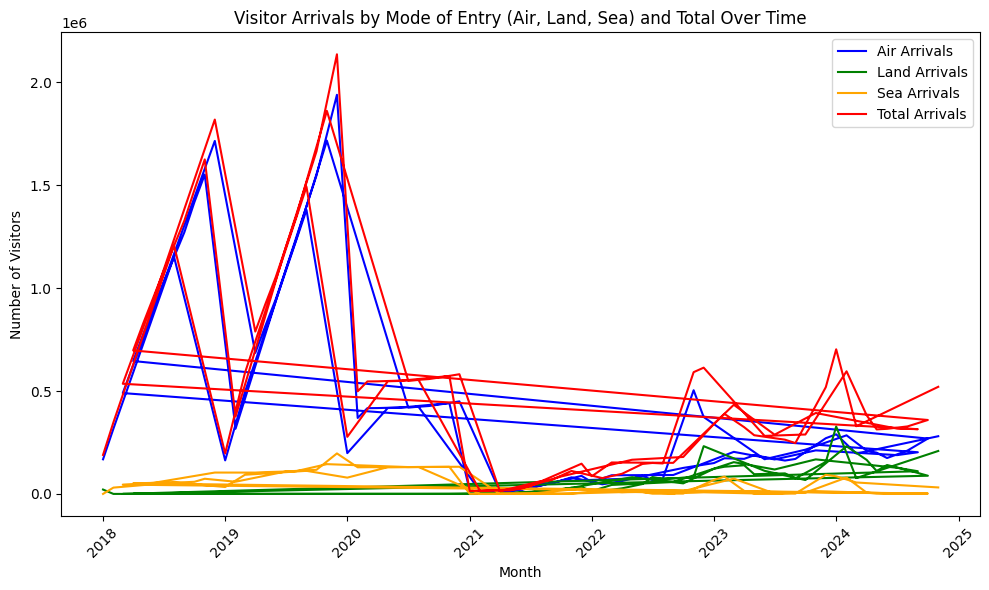

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['Month'], df['Air Arrivals'], label='Air Arrivals', color='blue')
plt.plot(df['Month'], df['Land Arrivals'], label='Land Arrivals', color='green')
plt.plot(df['Month'], df['Sea Arrivals'], label='Sea Arrivals', color='orange')
plt.plot(df['Month'], df['Total Visitor Arrivals'], label='Total Arrivals', color='red')

plt.title('Visitor Arrivals by Mode of Entry (Air, Land, Sea) and Total Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Visitors')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Perform Correlation Analysis

In [ ]:
correlation_matrix = df[['Air Arrivals', 'Land Arrivals', 'Sea Arrivals', 'Total Visitor Arrivals']].corr()

# Display the correlation matrix
correlation_matrix

,Air Arrivals,Land Arrivals,Sea Arrivals,Total Visitor Arrivals
Air Arrivals,1.000000,-0.332987,0.625172,0.988804
Land Arrivals,-0.332987,1.000000,-0.307664,-0.212607
Sea Arrivals,0.625172,-0.307664,1.000000,0.669642
Total Visitor Arrivals,0.988804,-0.212607,0.669642,1.000000


Seasonal Trend Analysis

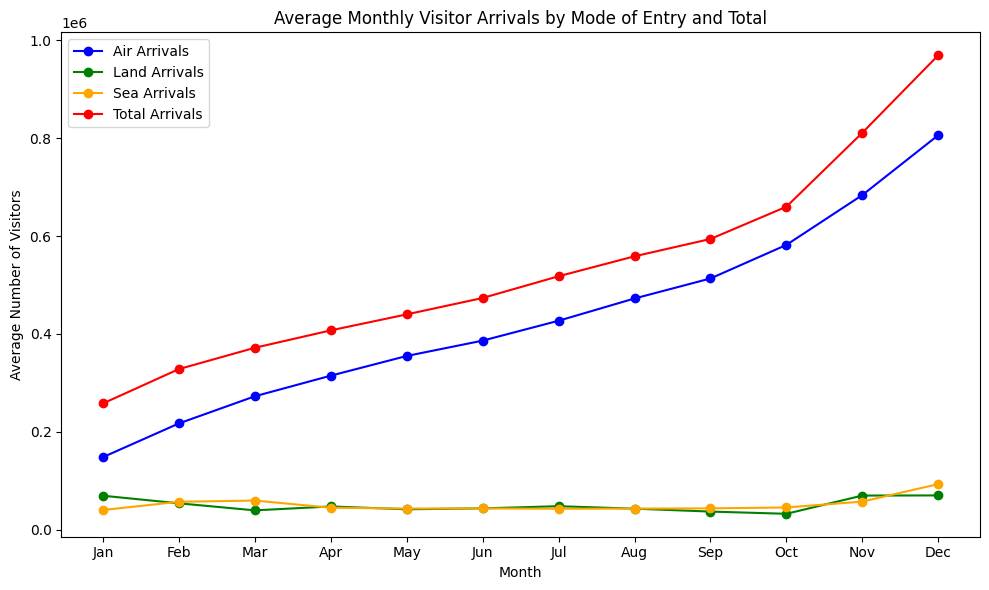

In [ ]:
# Extracting month and year from 'Month' column for seasonal analysis
df['Year'] = df['Month'].dt.year
df['Month_Num'] = df['Month'].dt.month

# Calculating the average visitors for each month across all years
monthly_avg = df.groupby('Month_Num')[['Air Arrivals', 'Land Arrivals', 'Sea Arrivals', 'Total Visitor Arrivals']].mean()

# Plotting seasonal trends for each type of arrival
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg.index, monthly_avg['Air Arrivals'], label='Air Arrivals', color='blue', marker='o')
plt.plot(monthly_avg.index, monthly_avg['Land Arrivals'], label='Land Arrivals', color='green', marker='o')
plt.plot(monthly_avg.index, monthly_avg['Sea Arrivals'], label='Sea Arrivals', color='orange', marker='o')
plt.plot(monthly_avg.index, monthly_avg['Total Visitor Arrivals'], label='Total Arrivals', color='red', marker='o')

plt.title('Average Monthly Visitor Arrivals by Mode of Entry and Total')
plt.xlabel('Month')
plt.ylabel('Average Number of Visitors')
plt.xticks(monthly_avg.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.tight_layout()
plt.show()


Ttest

In [ ]:


# Define the months to analyze
jan_2023 = df[df['Month'] == '2023-01-01'][['Air Arrivals', 'Land Arrivals', 'Sea Arrivals', 'Total Visitor Arrivals']]
dec_2019 = df[df['Month'] == '2019-12-01'][['Air Arrivals', 'Land Arrivals', 'Sea Arrivals', 'Total Visitor Arrivals']]
jan_2021 = df[df['Month'] == '2021-01-01'][['Air Arrivals', 'Land Arrivals', 'Sea Arrivals', 'Total Visitor Arrivals']]

# Perform t-tests comparing these months against the rest of the data for each arrival type
normal_data = df[(df['Month'] != '2023-01-01') & (df['Month'] != '2019-12-01') & (df['Month'] != '2021-01-01')]

# Perform t-test for each entry mode and total arrivals
t_tests = {}
for col in ['Air Arrivals', 'Land Arrivals', 'Sea Arrivals', 'Total Visitor Arrivals']:
    jan_2023_test = ttest_ind(jan_2023[col], normal_data[col], alternative='two-sided')
    dec_2019_test = ttest_ind(dec_2019[col], normal_data[col], alternative='two-sided')
    jan_2021_test = ttest_ind(jan_2021[col], normal_data[col], alternative='two-sided')

    t_tests[col] = {
        'Jan 2023 p-value': jan_2023_test.pvalue,
        'Dec 2019 p-value': dec_2019_test.pvalue,
        'Jan 2021 p-value': jan_2021_test.pvalue
    }

# Display p-values for the t-tests
t_tests


{'Air Arrivals': {'Jan 2023 p-value': np.float64(0.551175255456757),
  'Dec 2019 p-value': np.float64(0.0010020954679803543),
  'Jan 2021 p-value': np.float64(0.36722195092028687)},
 'Land Arrivals': {'Jan 2023 p-value': np.float64(0.3031769617704663),
  'Dec 2019 p-value': np.float64(0.4802323226858082),
  'Jan 2021 p-value': np.float64(0.4890166156088168)},
 'Sea Arrivals': {'Jan 2023 p-value': np.float64(0.7150444346034168),
  'Dec 2019 p-value': np.float64(0.004577549181094893),
  'Jan 2021 p-value': np.float64(0.3352989730015328)},
 'Total Visitor Arrivals': {'Jan 2023 p-value': np.float64(0.7021339690141762),
  'Dec 2019 p-value': np.float64(0.0006644885536116916),
  'Jan 2021 p-value': np.float64(0.27565969195504586)}}

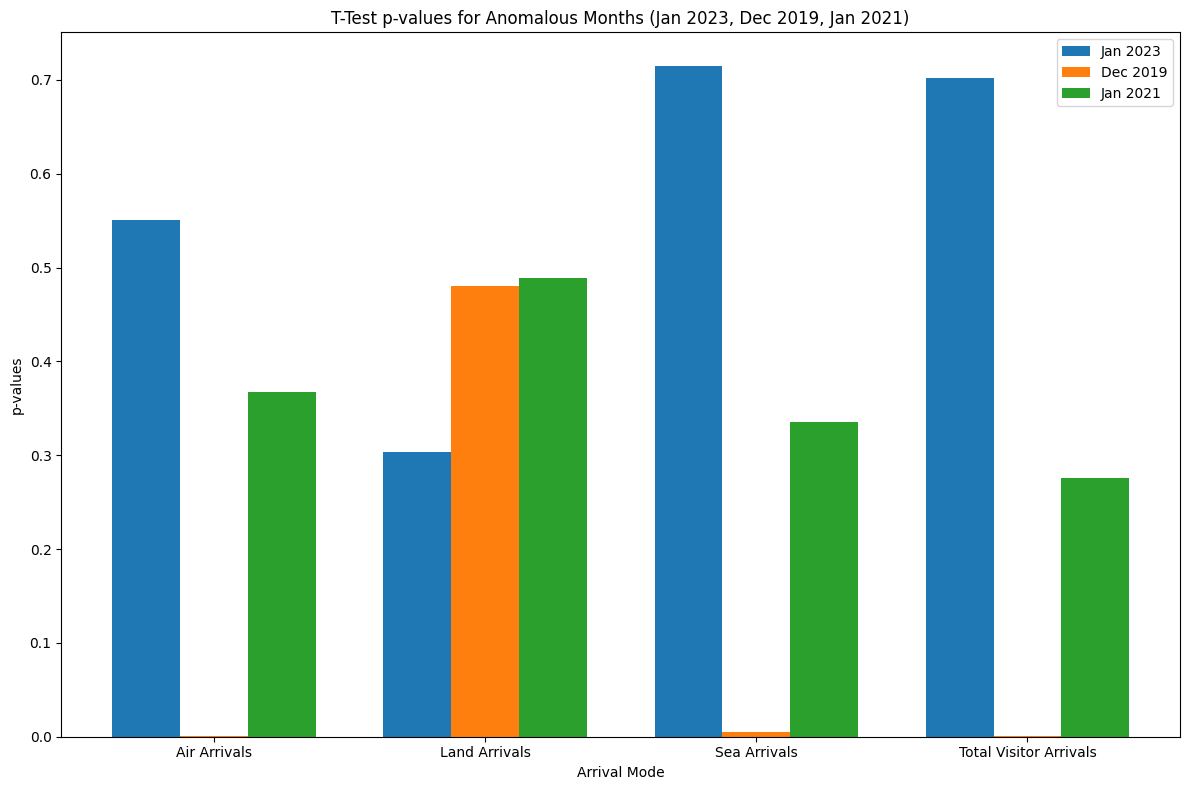

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the p-values from the t-test results for the three months
labels = ['Air Arrivals', 'Land Arrivals', 'Sea Arrivals', 'Total Visitor Arrivals']

# Extract p-values for each of the three months (Jan 2023, Dec 2019, Jan 2021)
jan_2023_p_values = [t_tests['Air Arrivals']['Jan 2023 p-value'],
                     t_tests['Land Arrivals']['Jan 2023 p-value'],
                     t_tests['Sea Arrivals']['Jan 2023 p-value'],
                     t_tests['Total Visitor Arrivals']['Jan 2023 p-value']]

dec_2019_p_values = [t_tests['Air Arrivals']['Dec 2019 p-value'],
                     t_tests['Land Arrivals']['Dec 2019 p-value'],
                     t_tests['Sea Arrivals']['Dec 2019 p-value'],
                     t_tests['Total Visitor Arrivals']['Dec 2019 p-value']]

jan_2021_p_values = [t_tests['Air Arrivals']['Jan 2021 p-value'],
                     t_tests['Land Arrivals']['Jan 2021 p-value'],
                     t_tests['Sea Arrivals']['Jan 2021 p-value'],
                     t_tests['Total Visitor Arrivals']['Jan 2021 p-value']]

# Create a bar chart to visualize the p-values for all three months
x = np.arange(len(labels))  # The label locations
width = 0.25  # The width of the bars

fig, ax = plt.subplots(figsize=(12, 8))

# Plot bars for the p-values of 2023, 2019, and 2021
bars1 = ax.bar(x - width, jan_2023_p_values, width, label='Jan 2023')
bars2 = ax.bar(x, dec_2019_p_values, width, label='Dec 2019')
bars3 = ax.bar(x + width, jan_2021_p_values, width, label='Jan 2021')

# Add some text for labels, title, and custom x-axis tick labels
ax.set_xlabel('Arrival Mode')
ax.set_ylabel('p-values')
ax.set_title('T-Test p-values for Anomalous Months (Jan 2023, Dec 2019, Jan 2021)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


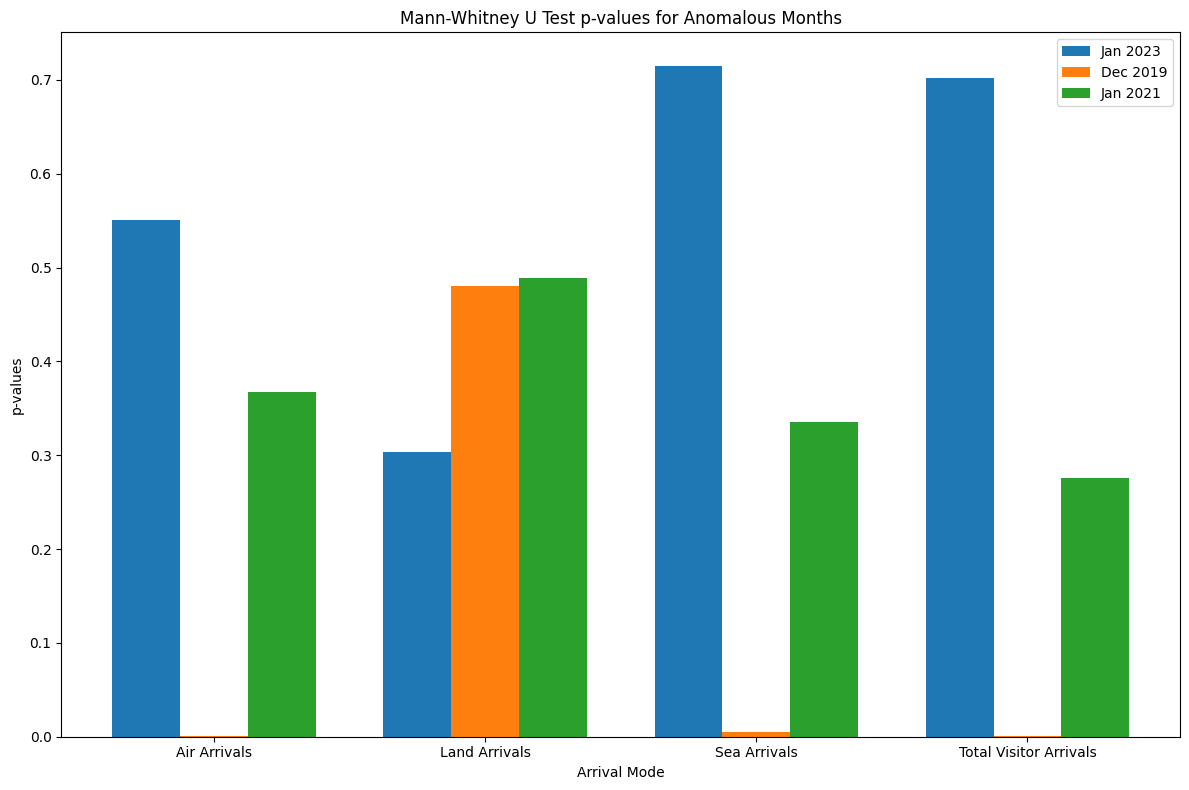

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the p-values from the t-test results for all three years
labels = ['Air Arrivals', 'Land Arrivals', 'Sea Arrivals', 'Total Visitor Arrivals']

# Extract p-values for each of the three years
jan_2023_p_values = [t_tests['Air Arrivals']['Jan 2023 p-value'],
                     t_tests['Land Arrivals']['Jan 2023 p-value'],
                     t_tests['Sea Arrivals']['Jan 2023 p-value'],
                     t_tests['Total Visitor Arrivals']['Jan 2023 p-value']]

dec_2019_p_values = [t_tests['Air Arrivals']['Dec 2019 p-value'],
                     t_tests['Land Arrivals']['Dec 2019 p-value'],
                     t_tests['Sea Arrivals']['Dec 2019 p-value'],
                     t_tests['Total Visitor Arrivals']['Dec 2019 p-value']]

jan_2021_p_values = [t_tests['Air Arrivals']['Jan 2021 p-value'],
                     t_tests['Land Arrivals']['Jan 2021 p-value'],
                     t_tests['Sea Arrivals']['Jan 2021 p-value'],
                     t_tests['Total Visitor Arrivals']['Jan 2021 p-value']]

# Create a bar chart to visualize the p-values for all three anomalous months
x = np.arange(len(labels))  # The label locations
width = 0.25  # The width of the bars

fig, ax = plt.subplots(figsize=(12, 8))

# Plot bars for the p-values of 2019, 2021, and 2023
bars1 = ax.bar(x - width, jan_2023_p_values, width, label='Jan 2023')
bars2 = ax.bar(x, dec_2019_p_values, width, label='Dec 2019')
bars3 = ax.bar(x + width, jan_2021_p_values, width, label='Jan 2021')

# Add some text for labels, title, and custom x-axis tick labels
ax.set_xlabel('Arrival Mode')
ax.set_ylabel('p-values')
ax.set_title('Mann-Whitney U Test p-values for Anomalous Months')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


Mann-Whitney U Test for Anomalous Data

In [ ]:


# Define the list of anomalous months
anomalous_months = ['2023-01-01', '2019-12-01', '2021-01-01']

# Initialize a dictionary to store the results
mann_whitney_results = {}

# Loop over the anomalous months
for anomaly in anomalous_months:
    # Extract the data for the anomalous month
    anomaly_data = df[df['Month'] == anomaly]

    # Extract the normal data (exclude the anomalous months)
    normal_data = df[df['Month'] != anomaly]

    # Perform the Mann-Whitney U test for each column (Air, Land, Sea, Total Arrivals)
    anomaly_results = {}

    for col in ['Air Arrivals', 'Land Arrivals', 'Sea Arrivals', 'Total Visitor Arrivals']:
        # Perform the Mann-Whitney U test for the current column
        u_test_result = mannwhitneyu(anomaly_data[col], normal_data[col], alternative='two-sided')

        # Store the p-value for each test
        anomaly_results[col] = u_test_result.pvalue

    # Store the results for the current anomalous month
    mann_whitney_results[anomaly] = anomaly_results

# Display the Mann-Whitney U test results for each anomalous month
mann_whitney_results


{'2023-01-01': {'Air Arrivals': np.float64(0.5542168674698796),
  'Land Arrivals': np.float64(0.21615811670821472),
  'Sea Arrivals': np.float64(0.7228915662650601),
  'Total Visitor Arrivals': np.float64(0.9397590361445779)},
 '2019-12-01': {'Air Arrivals': np.float64(0.024096385542168676),
  'Land Arrivals': np.float64(0.30781160388758555),
  'Sea Arrivals': np.float64(0.024096385542168676),
  'Total Visitor Arrivals': np.float64(0.024096385542168676)},
 '2021-01-01': {'Air Arrivals': np.float64(0.04819277108433735),
  'Land Arrivals': np.float64(0.8451693837029219),
  'Sea Arrivals': np.float64(0.04819277108433735),
  'Total Visitor Arrivals': np.float64(0.07228915662650603)}}

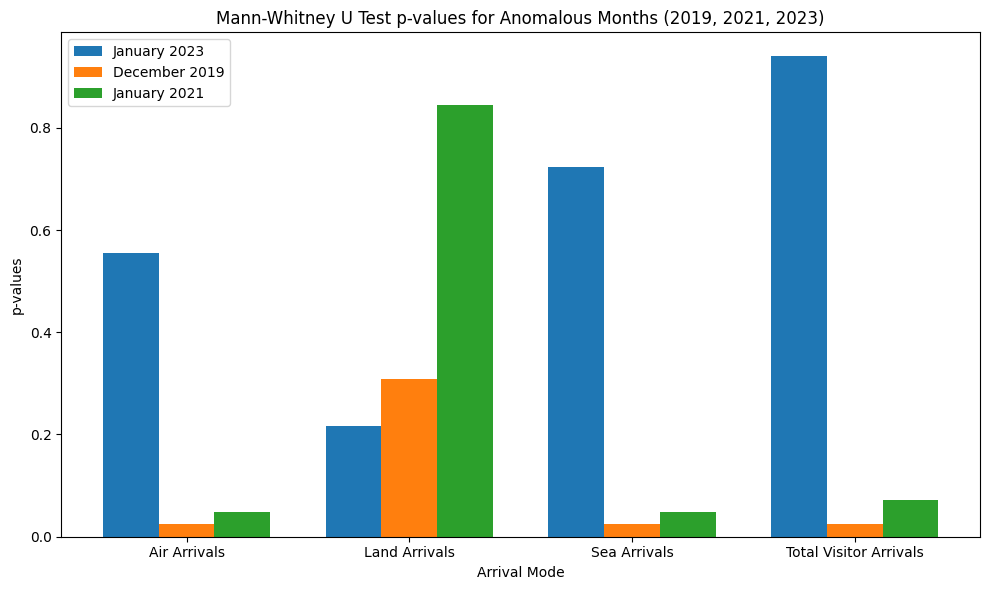

In [ ]:


# Prepare data for plotting
labels = ['Air Arrivals', 'Land Arrivals', 'Sea Arrivals', 'Total Visitor Arrivals']
anomalous_months = ['2023-01-01', '2019-12-01', '2021-01-01']  # Anomalous months (2023, 2019, 2021)

# Prepare lists to store the p-values for each anomalous month
p_values_2023 = [mann_whitney_results['2023-01-01'][col] for col in labels]
p_values_2019 = [mann_whitney_results['2019-12-01'][col] for col in labels]
p_values_2021 = [mann_whitney_results['2021-01-01'][col] for col in labels]

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width and positioning
bar_width = 0.25
index = np.arange(len(labels))

# Create bars for each anomalous month
bar1 = ax.bar(index, p_values_2023, bar_width, label='January 2023')
bar2 = ax.bar(index + bar_width, p_values_2019, bar_width, label='December 2019')
bar3 = ax.bar(index + 2 * bar_width, p_values_2021, bar_width, label='January 2021')

# Labeling the plot
ax.set_xlabel('Arrival Mode')
ax.set_ylabel('p-values')
ax.set_title('Mann-Whitney U Test p-values for Anomalous Months (2019, 2021, 2023)')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(labels)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


Yearly Growth Rate (Percentage Change)

In [ ]:
df['Year'] = df['Month'].dt.year
yearly_data = df.groupby('Year')['Total Visitor Arrivals'].sum()

# Calculate percentage change from the previous year
yearly_growth_rate = yearly_data.pct_change() * 100
yearly_growth_rate

,Total Visitor Arrivals
Year,
2018,NaN
2019,12.755437
2020,-53.405697
2021,-90.379448
2022,319.098046
2023,58.367763
2024,10.515139


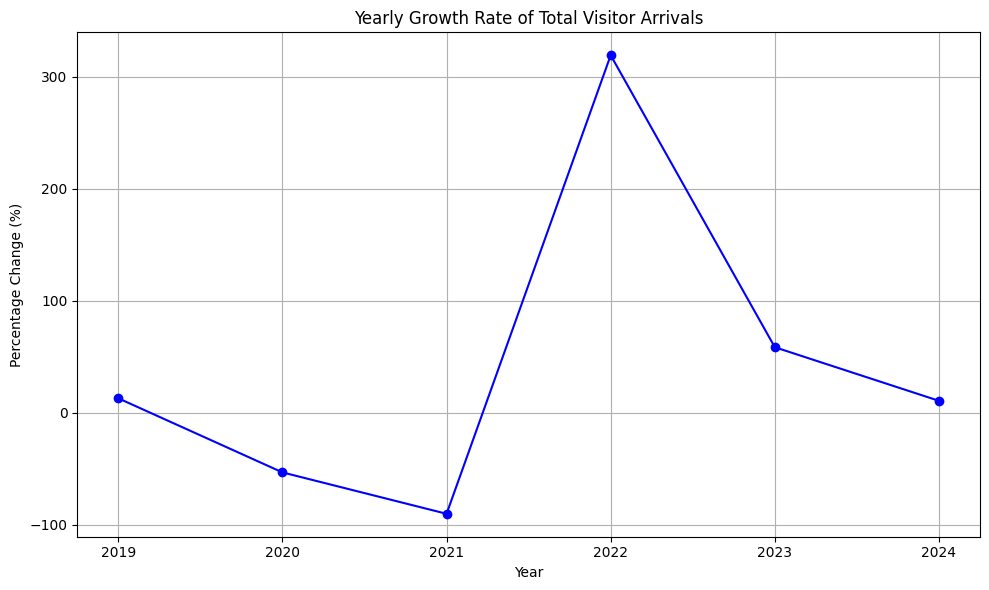

In [ ]:
df['Year'] = df['Month'].dt.year
yearly_data = df.groupby('Year')['Total Visitor Arrivals'].sum()

# Calculate percentage change from the previous year
yearly_growth_rate = yearly_data.pct_change() * 100

# Plot the yearly growth rate
plt.figure(figsize=(10, 6))
plt.plot(yearly_growth_rate.index, yearly_growth_rate, marker='o', color='b', label='Yearly Growth Rate')
plt.title('Yearly Growth Rate of Total Visitor Arrivals')
plt.xlabel('Year')
plt.ylabel('Percentage Change (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df

,Month,Air Arrivals,Land Arrivals,Sea Arrivals,Total Visitor Arrivals,Year,Month_Num
0,2024-11-01,280402,208687,31479,520568,2024,11
1,2024-03-01,196297,77090,55619,329006,2024,3
2,2024-01-01,289633,327509,85666,702808,2024,1
3,2023-12-01,270745,155378,92733,518856,2023,12
4,2023-09-01,169986,75631,1500,247117,2023,9
...,...,...,...,...,...,...,...
78,2019-03-01,495011,0,93061,588072,2019,3
79,2019-01-01,163026,0,33568,196594,2019,1
80,2018-08-01,1153300,0,55718,1209018,2018,8
81,2018-02-01,316957,0,30667,347624,2018,2
